# Battleship Puzzle

 Battleship Puzzle to gra logiczna, w której gracz ma za zadanie odnaleźć położenie statków na planszy określonym rozmiarze i liczbie statków. Plansza jest podzielona na siatkę, w której każde pole może być albo puste, albo zajmowane przez statek. Gracz otrzymuje wskazówki w postaci liczb umieszczonych przy kolumnach i wierszach planszy, które określają ile "kawałków" statków znajduje się w danej kolumnie lub wierszu.

Celem tego projektu jest wykorzystanie algorytmów genetycznych do rozwiązania problemu Battleship Puzzle.

## Biblioteki

Do realizacji projektu wykorzystano następujące biblioteki:

* matplotlib - wykresy efektywności
* pygad - algorytmy genetyczne
* numpy - matematyczne operatory
* time - pomiar czasu trwania algorytmu

## Dane wejściowe
Battleship Puzzle możemy reprezentować za pomocą macierzy binarnej, w której 0 oznacza pole puste, a 1 oznacza pole zajęte przez statek. Wartości liczb wskazówek określają, ile "kawałków" statków znajduje się w danej kolumnie lub wierszu.
Poniższy przykład pokazuje wszystkie rodzaje inputów:

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pygad
import time

gene_space = [0, 1]

inputs = [
    {"column_counts": [2, 0, 2, 2, 0, 4],
     "row_counts": [1, 4, 1, 0, 2, 2],
     "start_positions": {(0, 0): 0, (3, 4): 1},
     "correct": [
         [0, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 0, 1],
         [0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 0, 0],
         [1, 0, 0, 0, 0, 1]
     ]},
    {"column_counts": [3, 1, 1, 3, 0, 2],
     "row_counts": [2, 0, 2, 4, 1, 1],
     "start_positions": {(0, 4): 1, (0, 5): 0},
     "correct": [
         [0, 1, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 0, 1],
         [1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0]
     ]},
    {"column_counts": [3, 0, 2, 1, 3, 1],
     "row_counts": [2, 1, 2, 1, 4, 0],
     "start_positions": {(2, 1): 1, (2, 3): 0},
     "correct": [
         [1, 0, 0, 0, 1, 0],
         [0, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 1, 0],
         [1, 0, 0, 0, 0, 0],
         [1, 0, 0, 1, 1, 1],
         [0, 0, 0, 0, 0, 0]
     ]},
    {"column_counts": [5, 1, 5, 1, 0, 3, 0, 5, 1, 4],
     "row_counts": [3, 2, 2, 2, 3, 3, 4, 3, 1, 2],
     "start_positions": {(0, 0): 0, (7, 1): 0, (7, 3): 1, (5, 5): 1, (1, 6): 1, (1, 7): 0,
                         (9, 6): 0, (9, 8): 1, (2, 9): 1, (7, 9): 1},
     "correct": [
         [0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
         [1, 1, 0, 0, 0, 1, 0, 1, 0, 0],
         [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
     ]},
    {"column_counts": [6, 1, 3, 3, 0, 2, 3, 3, 1, 3],
     "row_counts": [3, 2, 4, 1, 6, 2, 2, 2, 3, 0],
     "start_positions": {(1, 0): 1, (9, 1): 0, (0, 2): 0, (6, 3): 0, (6, 5): 0, (2, 5): 1,
                         (2, 6): 1, (2, 7): 1, (5, 7): 0, (6, 7): 1},
     "correct": [
         [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
     ]},
    {"column_counts": [0, 2, 4, 2, 4, 0, 6, 0, 6, 1],
     "row_counts": [3, 2, 2, 2, 3, 4, 1, 5, 1, 2],
     "start_positions": {(0, 3): 1, (8, 2): 1, (1, 3): 0, (6, 4): 1, (3, 5): 0, (9, 5): 1,
                         (1, 6): 0, (4, 6): 0, (6, 8): 1, (2, 9): 0},
     "correct": [
         [0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
         [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
         [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
     ]},
    {"column_counts": [0, 2, 3, 6, 1, 1, 0, 6, 1, 1, 4, 2],
     "row_counts": [1, 2, 4, 2, 0, 6, 1, 2, 1, 3, 3, 2],
     "start_positions": {(4, 1): 1, (10, 1): 1, (7, 2): 1, (1, 3): 0, (8, 3): 0, (9, 3): 0, (1, 6): 0,
                         (3, 6): 1, (3, 7): 1, (5, 10): 1, (10, 9): 1, (10, 10): 0, (9, 11): 0, (11, 11): 1},
     "correct": [
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
         [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
         [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
     ]},
    {"column_counts": [1, 4, 2, 4, 2, 0, 2, 0, 7, 1, 4, 0],
     "row_counts": [6, 0, 1, 4, 1, 1, 0, 4, 2, 4, 3, 1],
     "start_positions": {(6, 3): 0, (9, 3): 1, (0, 4): 0, (1, 4): 0, (2, 4): 0, (1, 5): 0,
                         (3, 5): 1,  (4, 7): 1, (10, 7): 1, (10, 8): 1, (0, 9): 1, (3, 9): 0, (3, 10): 0},
     "correct": [
         [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
         [1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
     ]},
    {"column_counts": [2, 2, 0, 2, 4, 1, 0, 2, 5, 1, 0, 8],
     "row_counts": [1, 4, 2, 3, 2, 1, 3, 5, 2, 1, 0, 3],
     "start_positions": {(8, 0): 0, (11, 0): 1, (9, 1): 1, (11, 3): 1, (7, 3): 0, (8, 3): 1, (1, 4): 0, (3, 4): 1,
                         (7, 4): 0, (1, 5): 1, (7, 6): 0, (11, 6): 1, (0, 9): 0, (1, 11): 0, (5, 11): 1, (9, 11): 1},
     "correct": [
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
         [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
     ]}
]

correctnesses = [[], [], []]
times = [[], [], []]

W projekcie mamy po 3 plansze każdego rozwiaru inputów, t.j: plansze 6x6, 10x10 i 12x12.
Każda input opisany jest przez 4 wartości:

* column_counts - wskazówki dla kolumn
* row_counts - wskazówki dla wierszy
* start_positions - pozycje które dostaje się na początku gry
* correct - poprawne rozwiązanie

W zależności od rozmiaru planszy jest inna liczba statków, które należy wykryć. Lista długości statków dla poszczególnych plansz:

* 6x6 - 1 statek długości 3, 2 statki długości 2, 3 statki długości 1
* 10x10 - 1 statek długości 5, 1 statek długości 4, 2 statki długości 3, 3 statki długości 2, 4 statki długości 1
* 12x12 - 1 statek długości 5, 1 statek długości 4, 2 statki długości 3, 4 statki długości 2, 4 statki długości 1

Oto implementacja w kodzie:

In [81]:
for input_values in inputs:
    column_counts = input_values['column_counts']
    row_counts = input_values['row_counts']
    start_positions = input_values['start_positions']

    # board_size = (len(column_counts), len(row_counts))

    ship_lengths = []

    if board_size[0] == 6:
        ship_lengths = [3, 2, 2, 1, 1, 1]
    elif board_size[0] == 10:
        ship_lengths = [5, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1]
    elif board_size[0] == 12:
        ship_lengths = [5, 4, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1]

    print(f"Rozmiar inputu: {board_size[0]}x{board_size[1]}")
    print("Kolumny:", column_counts)
    print("Wiersze:", row_counts)
    print("Poczatkowe pozycje:", start_positions)

Rozmiar inputu: 10x10
Kolumny: [2, 0, 2, 2, 0, 4]
Wiersze: [1, 4, 1, 0, 2, 2]
Poczatkowe pozycje: {(0, 0): 0, (3, 4): 1}
Rozmiar inputu: 10x10
Kolumny: [3, 1, 1, 3, 0, 2]
Wiersze: [2, 0, 2, 4, 1, 1]
Poczatkowe pozycje: {(0, 4): 1, (0, 5): 0}
Rozmiar inputu: 10x10
Kolumny: [3, 0, 2, 1, 3, 1]
Wiersze: [2, 1, 2, 1, 4, 0]
Poczatkowe pozycje: {(2, 1): 1, (2, 3): 0}
Rozmiar inputu: 10x10
Kolumny: [5, 1, 5, 1, 0, 3, 0, 5, 1, 4]
Wiersze: [3, 2, 2, 2, 3, 3, 4, 3, 1, 2]
Poczatkowe pozycje: {(0, 0): 0, (7, 1): 0, (7, 3): 1, (5, 5): 1, (1, 6): 1, (1, 7): 0, (9, 6): 0, (9, 8): 1, (2, 9): 1, (7, 9): 1}
Rozmiar inputu: 10x10
Kolumny: [6, 1, 3, 3, 0, 2, 3, 3, 1, 3]
Wiersze: [3, 2, 4, 1, 6, 2, 2, 2, 3, 0]
Poczatkowe pozycje: {(1, 0): 1, (9, 1): 0, (0, 2): 0, (6, 3): 0, (6, 5): 0, (2, 5): 1, (2, 6): 1, (2, 7): 1, (5, 7): 0, (6, 7): 1}
Rozmiar inputu: 10x10
Kolumny: [0, 2, 4, 2, 4, 0, 6, 0, 6, 1]
Wiersze: [3, 2, 2, 2, 3, 4, 1, 5, 1, 2]
Poczatkowe pozycje: {(0, 3): 1, (8, 2): 1, (1, 3): 0, (6, 4): 1, (3, 

## Algorytm genetyczny

Chromosom będzie listą o długości odpowiadającej sumie ilości elementów na planszy, czyli nxn. Każdy element będzie kodować, czy pole planszy jest puste (0), czy zajęte (1). Populacja będzie wynosiła 3 krotną liczbę genów w chromosomie. Wielkość populacji została dobrana tak, aby zapewnić jak najlepsze wyniki, ale również aby była w miarę możliwość szybka. Eksperymenty były prowadzone przy użyciu 200 pokoleń, przy 20% szansie na mutację.

In [82]:
sol_per_pop = board_size[0] * board_size[1] * 3
num_genes = board_size[0] * board_size[1]

num_parents_mating = board_size[0] * board_size[1]
num_generations = 200
keep_parents = 5

parent_selection_type = "sss"

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 20

### Zakres funkcji fitness

Funkcja fitness przyjmuje wartości z zakresu (0, 1), gdzie 1 oznacza, że plansza kodowana przez chromosom jest identyczna z poprawną planszą, a 0 oznacza, że plansza kodowana przez chromosom nie ma żadnego pola takiego samego jak poprawna plansza.

In [83]:
def fitness_func(solution, solution_idx):
    # Konwertujemy rozwiązanie do postaci planszy o wymiarach board_size.
    sol_board = np.array(solution.reshape(board_size))

    fitness = 0

    # Sprawdzamy czy wartości startowe pokrywaja sie z rozwiązaniem
    for position, value in start_positions.items():
        row, col = position
        if sol_board[col][row] == value:
            fitness += 50

    # Sprawdzamy czy liczba suma (1) zgadza się z sumą długości wszystkich statków do odnalezienia
    ship_sum = sum([sum(sublist) for sublist in sol_board])

    if ship_sum == sum(ship_lengths):
        fitness += 100

    # Sprawdzamy ilość kawałków statków w rzędach.
    for i in range(board_size[0]):
        row_sum = np.sum(sol_board[i])
        if row_sum == row_counts[i]:
            fitness += 50

    # Sprawdzamy ilość kawałków statków w kolumnach.
    for j in range(board_size[1]):
        column_sum = np.sum(sol_board[:, j])
        if column_sum == column_counts[j]:
            fitness += 50

    # Inicjalizujemy słownik na pozycje odkrytych statków
    ship_positions = {length: [] for length in ship_lengths}

    # Sprawdzamy położenie statków na planszy
    for length in ship_lengths:
        find_ships(length, sol_board, ship_positions)

    # Sprawdzamy ilość statków i kolizje
    for ship in ship_positions:
        if len(ship_positions[ship]) == ship * sum(1 for x in ship_lengths if x == ship):
            fitness += 30
        if len(set(ship_positions[ship])) != len(ship_positions[ship]):
            fitness -= 30

    return fitness

Dodatkowo została użyta funkcja pomocnicza w odnajdowaniu statków i zwracaniu ich położeń w rozwiązaniu:

In [84]:
def find_ships(length, sol_board, ships_positions):
    for i in range(board_size[0]):
        for j in range(board_size[1]):
            # Sprawdzamy czy to może być potencjalny statek (czy nie koliduje ze wskazówkami)
            if sol_board[i, j] == 1 and column_counts[i] != 0 and row_counts[j] != 0:

                # Dodanie wstępnej pozycji
                new_ship_positions = [(i, j)]

                # Wyjście w przypadku statku o długości 1
                if length == 1:
                    ships_positions[length].extend(new_ship_positions)
                    return

                # Sprawdzanie kolejnych długości statków idąc w dół
                down_check = True
                for k in range(1, length):
                    if j + k < board_size[1] and sol_board[i, j + k] == 1 and column_counts[i] != 0:
                        new_ship_positions.append((i, j + k))
                    else:
                        down_check = False
                        new_ship_positions.clear()
                        break

                # Wyjście w przypadku pomyślnego odnalezienia
                if down_check:
                    ships_positions[length].extend(new_ship_positions)
                    return

                # Sprawdzanie kolejnych długości statków idąc w górę
                up_check = True
                for k in range(1, length):
                    if j - k >= 0 and sol_board[i, j - k] == 1 and column_counts[i] != 0:
                        new_ship_positions.append((i, j - k))
                    else:
                        up_check = False
                        new_ship_positions.clear()
                        break

                # Wyjście w przypadku pomyślnego odnalezienia
                if up_check:
                    ships_positions[length].extend(new_ship_positions)
                    return

                # Sprawdzanie kolejnych długości statków idąc w lewo
                left_check = True
                for k in range(1, length):
                    if i - k >= 0 and sol_board[i - k, j] == 1 and row_counts[j] != 0:
                        new_ship_positions.append((i - k, j))
                    else:
                        left_check = False
                        new_ship_positions.clear()
                        break

                # Wyjście w przypadku pomyślnego odnalezienia
                if left_check:
                    ships_positions[length].extend(new_ship_positions)
                    return

                # Sprawdzanie kolejnych długości statków idąc w prawo
                right_check = True
                for k in range(1, length):
                    if i + k < board_size[0] and sol_board[i + k, j] == 1 and row_counts[j] != 0:
                        new_ship_positions.append((i + k, j))
                    else:
                        right_check = False
                        new_ship_positions.clear()
                        break

                # Wyjście w przypadku pomyślnego odnalezienia
                if right_check:
                    ships_positions[length].extend(new_ship_positions)
                    return

Użyta jest również funkcja do liczenia procentu dopasowania najlepszego rozwiązania do rozwiązania idealnego:

In [85]:
def compare_matrixes(matrix_a, matrix_b):
    n = len(matrix_a)
    m = len(matrix_a[0])
    same = 0

    for i in range(n):
        for j in range(m):
            if matrix_a[i][j] == matrix_b[i][j]:
                same += 1

    return (same / (n * m)) * 100

## Uruchomienie algorytmu

------------------
Czas wykonywania algorytmu = 4.92s
Fitness najlepszego rozwiazania = 500
Prawidlowosc idealnego rozwiazania = 72.22%
A
Parametry najlepszego rozwiazania:
[0, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 1]
[1, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0]

------------------
Czas wykonywania algorytmu = 4.95s
Fitness najlepszego rozwiazania = 580
Prawidlowosc idealnego rozwiazania = 66.67%
A
Parametry najlepszego rozwiazania:
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0]

------------------
Czas wykonywania algorytmu = 4.95s
Fitness najlepszego rozwiazania = 550
Prawidlowosc idealnego rozwiazania = 61.11%
A
Parametry najlepszego rozwiazania:
[0, 0, 0, 0, 1, 1]
[1, 1, 1, 0, 0, 0]
[1, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 0]
[0, 0, 1, 0, 1, 0]

------------------------------
Czas wykonywania algorytmu = 29.43s
Fitness najlepszego rozwiazania = 880
Prawidlowosc idealnego rozwiaza

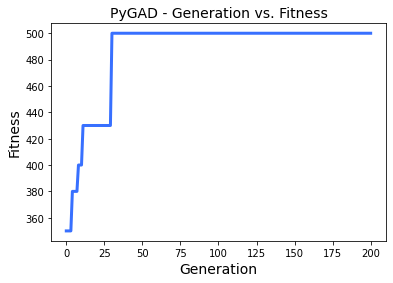

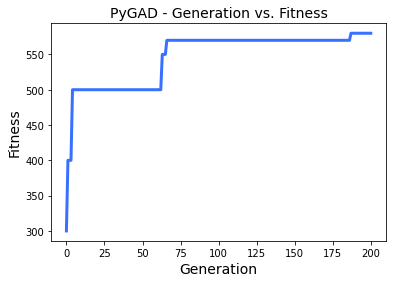

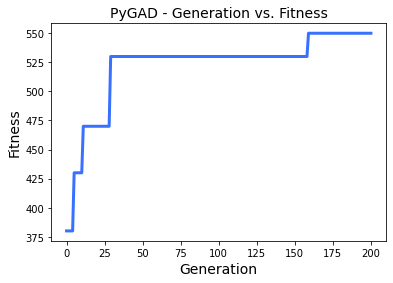

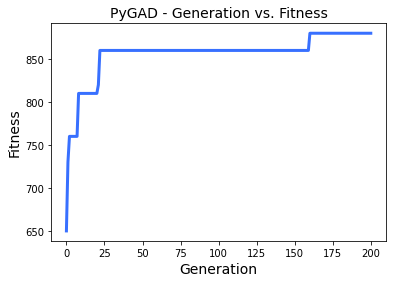

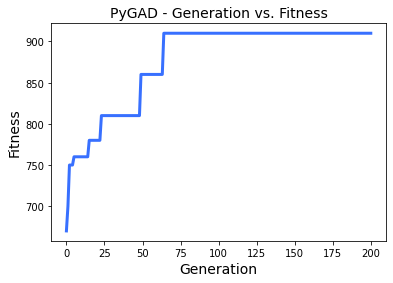

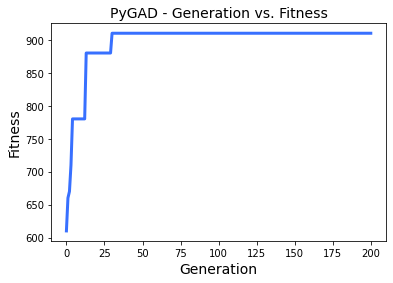

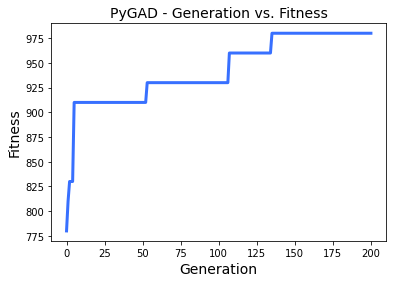

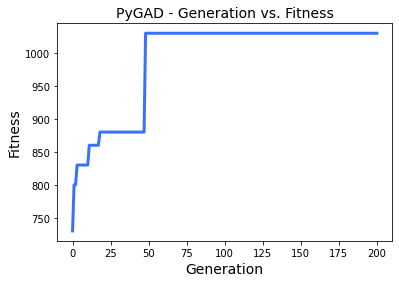

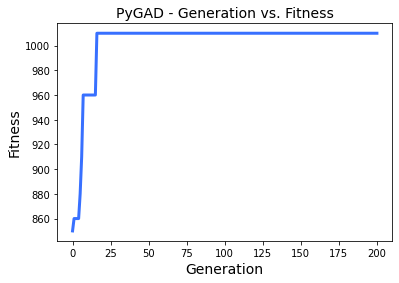

In [86]:
fitness_function = fitness_func

for input_values in inputs:
    column_counts = input_values['column_counts']
    row_counts = input_values['row_counts']
    start_positions = input_values['start_positions']

    board_size = (len(column_counts), len(row_counts))

    ship_lengths = []

    if board_size[0] == 6:
        ship_lengths = [3, 2, 2, 1, 1, 1]
    elif board_size[0] == 10:
        ship_lengths = [5, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1]
    elif board_size[0] == 12:
        ship_lengths = [5, 4, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1]

    sol_per_pop = board_size[0] * board_size[1] * 3
    num_genes = board_size[0] * board_size[1]

    num_parents_mating = board_size[0] * board_size[1]
    num_generations = 200
    keep_parents = 5

    parent_selection_type = "sss"

    crossover_type = "single_point"

    mutation_type = "random"
    mutation_percent_genes = 20

    start_time = time.time()

    # inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes)

    # uruchomienie algorytmu
    ga_instance.run()

    end_time = round(time.time() - start_time, 2)

    # podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    print('-' * 3 * board_size[0])
    print(f"Czas wykonywania algorytmu = {end_time}s")
    print("Fitness najlepszego rozwiazania = {solution_fitness}".format(
        solution_fitness=solution_fitness))

    solution_print = [list(map(int, sublist)) for sublist in solution.reshape((len(column_counts), len(row_counts)))]

    correctness = round(compare_matrixes(solution_print, input_values["correct"]), 2)

    print(f"Prawidlowosc idealnego rozwiazania = {correctness}%")

    if board_size[0] == 6:
        correctnesses[0].append(correctness)
        times[0].append(end_time)
    elif board_size[0] == 10:
        correctnesses[1].append(correctness)
        times[1].append(end_time)
    elif board_size[0] == 12:
        correctnesses[2].append(correctness)
        times[2].append(end_time)

    # Wyświetlenie najlepszego rozwiązania
    print("Parametry najlepszego rozwiazania:")
    for row in solution_print:
        print(row)
    print('=' * 3 * board_size[0])
    print()

    ga_instance.plot_fitness()
        

## Sprawdzenie efektywności algorytmu genetycznego

Algorytm genetyczny był sprawdzany na 100 powtórzeniach dla wszystkich 9 różnych inputów. Brane pod uwagę były procent prawidłowości do idealnego rozwiązania oraz czas wykonania.

------------------------------
[66.66666666666667, 55.666666666666664, 55.553333333333335]
Średnia prawidłowść rozwiązania
Małe inputy: [72.22, 66.67, 61.11]%
Średnie inputy: [59.0, 56.0, 52.0]%
Duże inputy: [58.33, 56.25, 52.08]%

Średni czas
Małe inputy: [4.92, 4.95, 4.95]s
Średnie inputy: [29.43, 29.37, 30.83]s
Duże inputy: [51.11, 48.15, 48.35]s


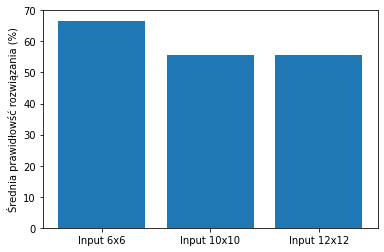

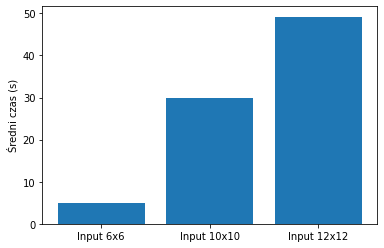

In [88]:
print('-' * 30)

correctness_rounded = [np.mean(c) for c in correctnesses]

print(correctness_rounded)

# tworzenie wykresu
plt.bar(range(len(correctness_rounded)), correctness_rounded)

# dodanie etykiet osi
plt.xticks(range(len(correctness_rounded)), ['Input 6x6', 'Input 10x10', 'Input 12x12'])
plt.ylabel('Średnia prawidłowść rozwiązania (%)')

# wyświetlenie wykresu
plt.show()


print('Średnia prawidłowść rozwiązania')
print(f'Małe inputy: {correctnesses[0]}%')
print(f'Średnie inputy: {correctnesses[1]}%')
print(f'Duże inputy: {correctnesses[2]}%\n')

times_rounded = [np.mean(t) for t in times]

# tworzenie wykresu
plt.bar(range(len(times_rounded)), times_rounded)

# dodanie etykiet osi
plt.xticks(range(len(times_rounded)), ['Input 6x6', 'Input 10x10', 'Input 12x12'])
plt.ylabel('Średni czas (s)')

# wyświetlenie wykresu
plt.show()

print('Średni czas')
print(f'Małe inputy: {times[0]}s')
print(f'Średnie inputy: {times[1]}s')
print(f'Duże inputy: {times[2]}s')

## Bilbiografia

* Wikipedia: [https://en.wikipedia.org/wiki/Battleship_(puzzle)](https://en.wikipedia.org/wiki/Battleship_(puzzle))
* Strona z grą: [https://www.puzzle-battleships.com/](https://www.puzzle-battleships.com/)
* Strona z grą 2: [https://www.brainbashers.com/battleships.asp?error=Y](https://www.brainbashers.com/battleships.asp?error=Y)
* Film na YouTube: [https://www.youtube.com/watch?v=pZqraGPa6gw](https://www.youtube.com/watch?v=pZqraGPa6gw)